Question:

1. Top10 countries of the highest weekly average fatality rate on 2022/01/01?
2. Which country has the most confirmed cases on 2022/01/01?

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the API endpoint URL
url = "https://covid-api.com/api/reports?date=2022-01-01"

# Make a GET request to the API
response = requests.get(url)

# Parse the JSON response into a Python dictionary
data = response.json()

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data)
df

,data
0,"{'date': '2022-01-01', 'confirmed': 158107, 'd..."
1,"{'date': '2022-01-01', 'confirmed': 210224, 'd..."
2,"{'date': '2022-01-01', 'confirmed': 218818, 'd..."
3,"{'date': '2022-01-01', 'confirmed': 23740, 'de..."
4,"{'date': '2022-01-01', 'confirmed': 82398, 'de..."
...,...
779,"{'date': '2022-01-01', 'confirmed': 1746092, '..."
780,"{'date': '2022-01-01', 'confirmed': 469748, 'd..."
781,"{'date': '2022-01-01', 'confirmed': 10127, 'de..."
782,"{'date': '2022-01-01', 'confirmed': 257948, 'd..."


In [2]:
# Separate columns by normalize function, sort by A-Z
df = pd.json_normalize(data['data']) 
df = df.sort_values(by='region.iso')
df

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,region.iso,region.name,region.province,region.lat,region.long,region.cities
0,2022-01-01,158107,7356,0,23,0,0,2022-01-02 04:20:52,150751,23,0.0465,AFG,Afghanistan,,33.9391,67.7100,[]
4,2022-01-01,82398,1772,0,805,2,0,2022-01-02 04:20:52,80626,803,0.0215,AGO,Angola,,-11.2027,17.8739,[]
1,2022-01-01,210224,3217,0,0,0,0,2022-01-02 04:20:52,207007,0,0.0153,ALB,Albania,,41.1533,20.1683,[]
3,2022-01-01,23740,140,0,0,0,0,2022-01-02 04:20:52,23600,0,0.0059,AND,Andorra,,42.5063,1.5218,[]
758,2022-01-01,764493,2165,0,2556,1,0,2022-01-02 04:20:52,762328,2555,0.0028,ARE,United Arab Emirates,,23.4241,53.8478,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2022-01-01,3,0,0,0,0,0,2022-01-02 04:20:52,3,0,0.0000,WSM,Samoa,,-13.759,-172.1046,[]
781,2022-01-01,10127,1984,0,1,0,0,2022-01-02 04:20:52,8143,1,0.1959,YEM,Yemen,,15.552726999999999,48.516388,[]
613,2022-01-01,3468079,91198,0,9793,53,0,2022-01-02 04:20:52,3376881,9740,0.0263,ZAF,South Africa,,-30.5595,22.9375,[]
782,2022-01-01,257948,3740,0,3674,6,0,2022-01-02 04:20:52,254208,3668,0.0145,ZMB,Zambia,,-13.1339,27.8493,[]


In [3]:
# Can see that there are multiple data for each country
print("There are ", df["region.iso"].nunique(), "regions in total.")
print("But there are ", len(df), "rows of data, need to combine by each region.")
df["region.iso"].value_counts()

There are  194 regions in total.
But there are  784 rows of data, need to combine by each region.


region.iso
RUS    83
USA    59
JPN    49
IND    37
CHN    34
       ..
HTI     1
HUN     1
IDN     1
IRL     1
ZWE     1
Name: count, Length: 194, dtype: int64

In [4]:
# Aggregate data
aggregated_df = df.groupby('region.iso').agg({
    'confirmed': 'sum',
    'deaths': 'sum',
    'recovered': 'sum',
    'fatality_rate': 'mean',
    'region.name': 'first',
    'region.province': 'first',
    'region.lat': 'first',
    'region.long': 'first',
}).reset_index()

aggregated_df = aggregated_df.sort_values(by='region.iso')
aggregated_df

,region.iso,confirmed,deaths,recovered,fatality_rate,region.name,region.province,region.lat,region.long
0,AFG,158107,7356,0,0.0465,Afghanistan,,33.9391,67.7100
1,AGO,82398,1772,0,0.0215,Angola,,-11.2027,17.8739
2,ALB,210224,3217,0,0.0153,Albania,,41.1533,20.1683
3,AND,23740,140,0,0.0059,Andorra,,42.5063,1.5218
4,ARE,764493,2165,0,0.0028,United Arab Emirates,,23.4241,53.8478
...,...,...,...,...,...,...,...,...,...
189,WSM,3,0,0,0.0000,Samoa,,-13.759,-172.1046
190,YEM,10127,1984,0,0.1959,Yemen,,15.552726999999999,48.516388
191,ZAF,3468079,91198,0,0.0263,South Africa,,-30.5595,22.9375
192,ZMB,257948,3740,0,0.0145,Zambia,,-13.1339,27.8493


In [5]:
top_10_fatality = aggregated_df.sort_values(by='fatality_rate', ascending=False).head(10)
top_10_fatality

,region.iso,confirmed,deaths,recovered,fatality_rate,region.name,region.province,region.lat,region.long
124,NA-SHIP-MSZ,9,2,0,0.222200,MS Zaandam,,0.0,0.0
190,YEM,10127,1984,0,0.195900,Yemen,,15.552726999999999,48.516388
188,VUT,7,1,0,0.142900,Vanuatu,,-15.3767,166.9592
110,MEX,3979723,299428,0,0.081182,Mexico,Sinaloa,25.1721,-107.4795
136,PER,2296831,202690,0,0.078923,Peru,Huancavelica,-13.023888000000001,-75.00277
150,SDN,46518,3331,0,0.071600,Sudan,,12.8628,30.2176
12,BEL,2105343,28331,0,0.067958,Belgium,Liege,50.4496,5.8492
50,ECU,549418,33681,0,0.061300,Ecuador,,-1.8312,-78.1834
167,SYR,50310,2901,0,0.057700,Syria,,34.8021,38.9968
157,SOM,23532,1333,0,0.056600,Somalia,,5.1521,46.1996


In [6]:
# Drop rows with 'MS Zaandam' in the 'region_name' column
top_10_fatality = top_10_fatality.drop(top_10_fatality[top_10_fatality['region.name'].str.contains('MS Zaandam')].index)
top_10_fatality

,region.iso,confirmed,deaths,recovered,fatality_rate,region.name,region.province,region.lat,region.long
190,YEM,10127,1984,0,0.195900,Yemen,,15.552726999999999,48.516388
188,VUT,7,1,0,0.142900,Vanuatu,,-15.3767,166.9592
110,MEX,3979723,299428,0,0.081182,Mexico,Sinaloa,25.1721,-107.4795
136,PER,2296831,202690,0,0.078923,Peru,Huancavelica,-13.023888000000001,-75.00277
150,SDN,46518,3331,0,0.071600,Sudan,,12.8628,30.2176
12,BEL,2105343,28331,0,0.067958,Belgium,Liege,50.4496,5.8492
50,ECU,549418,33681,0,0.061300,Ecuador,,-1.8312,-78.1834
167,SYR,50310,2901,0,0.057700,Syria,,34.8021,38.9968
157,SOM,23532,1333,0,0.056600,Somalia,,5.1521,46.1996


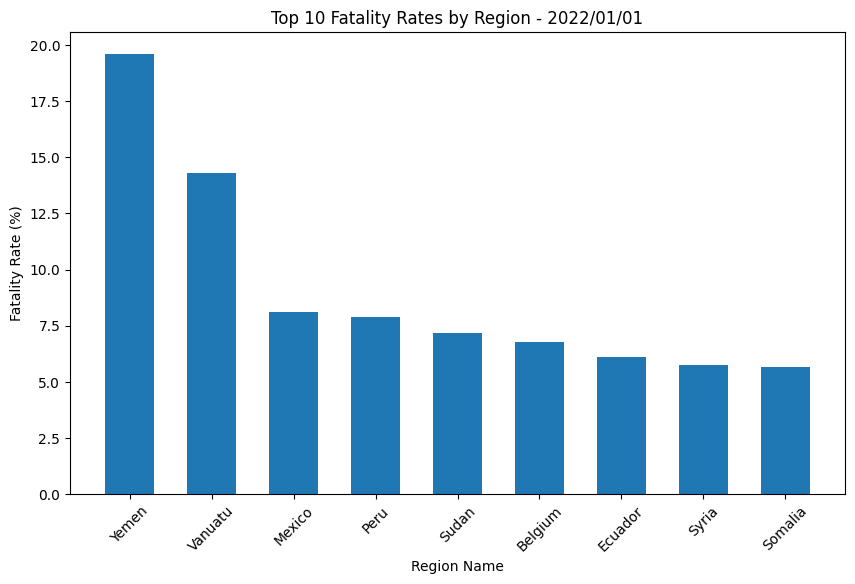

Answer: Top 10 Fatality Rates by Region as above


In [7]:
# Create a bar chart for the top 10 fatality rates for Question1
plt.figure(figsize=(10, 6))
plt.bar(top_10_fatality['region.name'], top_10_fatality['fatality_rate']*100, width=0.6)
plt.title('Top 10 Fatality Rates by Region - 2022/01/01')
plt.xlabel('Region Name')
plt.ylabel('Fatality Rate (%)')
plt.xticks(rotation=45)
plt.show()

print("Answer: Top 10 Fatality Rates by Region as above")

In [8]:
top_10_confirmed = aggregated_df.sort_values(by='confirmed', ascending=False).head(10)
top_10_confirmed

,region.iso,confirmed,deaths,recovered,fatality_rate,region.name,region.province,region.lat,region.long
182,USA,54859966,825816,0,0.013353,US,Vermont,44.0459,-72.7107
76,IND,34861579,481486,0,0.012716,India,Uttarakhand,30.156447,79.197608
23,BRA,22295621,619367,0,0.024700,Brazil,Pernambuco,-8.8137,-36.9541
60,GBR,13174528,149251,0,0.007550,United Kingdom,Bermuda,32.3078,-64.7505
147,RUS,10340011,303496,0,0.030112,Russia,Saratov Oblast,51.6520555,46.86319520000001
58,FRA,10296909,124839,0,0.010983,France,Saint Barthelemy,17.9000,-62.8333
176,TUR,9521251,82506,0,0.008700,Turkey,,38.9637,35.2433
44,DEU,7196154,112157,0,0.015000,Germany,Mecklenburg-Vorpommern,53.6127,12.4296
53,ESP,6294745,89405,0,0.013255,Spain,Andalusia,37.5443,-4.7278
82,ITA,6266939,137513,0,0.021648,Italy,Campania,40.83956555,14.25084984


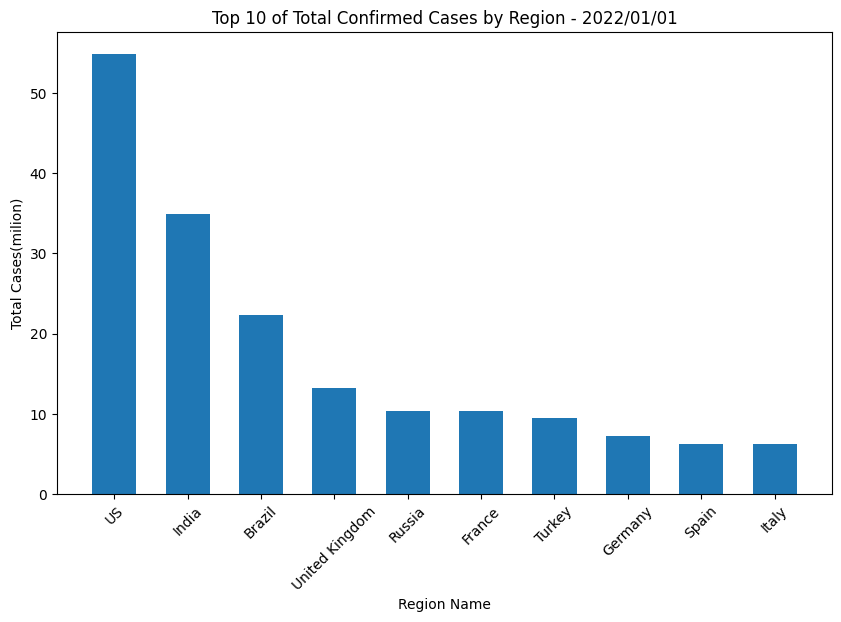

Top 10 of Total Confirmed Cases by Region as above


In [9]:
# Create a bar chart for the top 10 fatality rates
plt.figure(figsize=(10, 6))
plt.bar(top_10_confirmed['region.name'], top_10_confirmed['confirmed']/1000000, width=0.6)
plt.title('Top 10 of Total Confirmed Cases by Region - 2022/01/01')
plt.xlabel('Region Name')
plt.ylabel('Total Cases(milion)')
plt.xticks(rotation=45)
plt.show()

print("Top 10 of Total Confirmed Cases by Region as above")